<a href="https://colab.research.google.com/github/HelloWorld33333/Pork/blob/main/n121a_hypothesis_test_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 1*

# 📝 Assignment

# 가설 검정

## 1. One-Sample T-test 연습

### 데이터 불러오기
- [서울시 가로수 데이터셋](https://data.seoul.go.kr/dataList/367/S/2/datasetView.do)을 사용합니다.

다음 링크를 참조하세요. 
<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt>


In [ ]:
import pandas as pd

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt', sep = '\t', skiprows = 1)

df = df.replace({'-':0})

df

,기간,자치구,노선수,수량,은행나무,양버즘나무,느티나무,왕벚나무,은단풍나무,메타세콰이어,회화나무,가죽나무,감나무,수양버들,튜울립나무,칠엽수,포플러,느릅나무,살구나무,무궁화,소나무,목련,이팝나무,기타
0,2019,서울시,"1,412","307,351","108,050","62,474","37,473","34,150",545,"5,171","7,816",52,871,32,948,"1,533",7,504,234,"2,374","4,539",378,"20,088","20,112"
1,2019,종로구,70,"7,329","4,072","1,071",619,421,0,1,140,1,0,8,0,17,0,0,0,0,239,0,711,29
2,2019,중구,48,"8,250","3,640",162,460,289,0,0,176,0,0,0,7,0,0,0,21,46,"2,162",0,470,817
3,2019,용산구,39,"7,835","4,444","1,422",373,262,0,0,37,0,74,0,13,16,0,0,39,0,51,126,198,780
4,2019,성동구,38,"8,120","1,090","2,401","1,975",602,29,48,325,33,146,0,0,1,3,59,0,0,53,0,709,646
5,2019,광진구,28,"7,223","1,247","2,306","1,057",940,0,0,153,0,25,0,58,101,0,0,0,0,20,113,760,443
6,2019,동대문구,43,"10,664","3,749","3,342",855,747,0,60,143,7,38,7,37,19,0,1,26,1,0,0,"1,176",456
7,2019,중랑구,57,"8,365","2,774","2,759",471,354,0,74,0,0,52,0,0,0,0,0,0,212,64,0,449,"1,156"
8,2019,성북구,78,"8,449","2,722","1,282","1,014","1,656",66,65,38,0,91,0,4,0,0,0,9,5,97,0,853,547
9,2019,강북구,31,"7,789","3,510",934,324,497,284,0,103,0,0,0,5,0,0,140,0,0,"1,007",0,575,410


### "서울시에는 구별로 평균 약 400 그루 정도의 `이팝나무`가 있다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue 값을 `pv1`에 저장하세요. (`.pvalue` 사용)

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/seoul_tree/seoul_tree.txt', sep = '\t', skiprows = 1)

df = df.replace({'-':0})

df1 = df[['자치구','이팝나무']]
df1['이팝나무'] = pd.to_numeric(df1['이팝나무'].str.replace(',',''))
df1 = df1.iloc[1:25]

#df1 = df1.astype(str)
#df1['자치구'] = df['자치구'.str.contiains("구")]


print(stats.ttest_1samp(df1['이팝나무'], 400))
print(np.mean(df1['이팝나무']))

pv1 = stats.ttest_1samp(df1['이팝나무'], 400).pvalue

pv1


Ttest_1sampResult(statistic=3.265544513180618, pvalue=0.0034005679830198176)
690.5833333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0.0034005679830198176

### 이번에는 10개의 구를 샘플링하여, 위에 대한 가설검정을 다시 한번 시행해보세요.

- 단, 아래의 코드를 참조하여 sample을 위한 seed 는 123로 설정하세요.
- 가설검정 결과의 pvalue값을 `pv2`에 저장하세요


In [ ]:
import numpy as np
np.random.seed(123)

#"~" = np.random.choice("", size = 10)  #"~"와 " "을 적절한 값으로 채우시면 됩니다

pick = np.random.choice(df1['자치구'], size = 10)


df2 = df1[df1['자치구'].isin(pick)]

#pick_sample = df['자치구'].apply(pick)


df2
pv2 = stats.ttest_1samp(df2['이팝나무'], 400).pvalue
pv2

0.38638498922886266

## 2. Two-Sample T-test 연습

### "서울시의 구별 평균 느티나무수와 왕벚나무의 수는 차이가 없다"라는 가설에 대해 가설검정을 시행하세요.

- 단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.
- 가설검정 결과의 pvalue를 `pv3`에 저장하세요

In [ ]:
df3 = df[['느티나무','왕벚나무']]
df3['느티나무'] = pd.to_numeric(df3['느티나무'].str.replace(',',''))
df3['왕벚나무'] = pd.to_numeric(df3['왕벚나무'].str.replace(',',''))
df3 = df3.iloc[1:25]


pv3 = stats.ttest_ind(df3['느티나무'], df3['왕벚나무']).pvalue
pv3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0.6491843629706436


### Two-Sample One-tailed test를 사용하여 **평균 느티나무수가 왕벚나무 수보다 크다**라는 가설에 대한 가설검정을 시행하세요.
- 해당 가설검정의 결과를 `ans`에 저장하세요.

이 때 `ans`가 가질 수 있는 값은 아래와 같습니다 :
1. "느티나무" ( 느티나무의 수가 통계적으로 유의하게 많은 경우 )
2. "왕벚나무" ( 왕벚나무의 수가 통계적으로 유의하게 많은 경우 )
3. "없음" (통계적으로 유의하지 않은 경우)

Two-Sample One-tailed test를 scipy에서 하는 방법은 아래의 링크를 참고 하세요  
참고 링크 : https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
# 아래의 코드를 실행해주세요
!pip install scipy --upgrade

In [ ]:
print(stats.ttest_ind(df3['느티나무'], df3['왕벚나무'], alternative='greater'))
pv4 = (stats.ttest_ind(df3['느티나무'], df3['왕벚나무'], alternative='greater').pvalue)/2
t = stats.ttest_ind(df3['느티나무'], df3['왕벚나무'], alternative='greater').statistic

#느티나무의 평균이 왕벚나무의 평균보다 크다는 가설에 대한 가설검정을 실행했을 때 pvalue의 값이 0.05 보다 큰 0.32가 나옴으로써 통계적으로 느티나무의 수가 유의미하게 많음을 알 수 있습니다.

if pv4 < 0.05 and t > 0 : ans = '느티나무'
elif pv4 >= 0.04 and t < 0 : ans = '왕벚나무'
else : ans = '없음'


ans

Ttest_indResult(statistic=0.4578939039459027, pvalue=0.3245921814853218)


'없음'

## 🔥 **도전과제**
> 2문제 모두 하면 됩니다.



### 1. Compare mean for multiple-sample 
 
다음 링크를 참조하세요. <https://reneshbedre.github.io/blog/anova.html>

구별, 은행나무, 양버즘나무, 느티나무에 대해서 ANOVA Test를 실행하세요.

단, `서울시`, `공원녹지사업소`, `시설관리공단` 부분의 데이터는 제외합니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

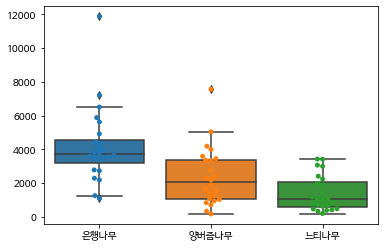

,sum_sq,df,F,PR(>F)
느티나무,1.241232e+07,1.0,2.725601,0.112956
Residual,1.001875e+08,22.0,NaN,NaN


In [ ]:
df4 = df[['자치구', '은행나무','양버즘나무', '느티나무']]
df4['은행나무'] = pd.to_numeric(df4['은행나무'].str.replace(',',''))
df4['양버즘나무'] = pd.to_numeric(df4['양버즘나무'].str.replace(',',''))
df4['느티나무'] = pd.to_numeric(df4['느티나무'].str.replace(',',''))

df4 = df4.iloc[1:25]



import matplotlib.pyplot as plt
import seaborn as sns


ax = sns.boxplot(data=df4)
ax = sns.swarmplot(data=df4)
plt.show()


fvalue, pvalue = stats.f_oneway(df4['은행나무'], df4['양버즘나무'], df4['느티나무'])


import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('은행나무 ~ 느티나무', data=df4).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table


In [ ]:
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'value']




fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)



df
anova_table

### 2. Sampling

- 세션 시간에 배웠던 4가지 sampling (Simple Random, Systematic, Stratified Random, Cluster) 방식을 구현해보세요.

- 이를 위한 데이터는 1 부터 100을 담은 numpy array이며, Sampling 해야 하는 수는 20개 입니다.

- Stratified Random Sampling을 위한 그룹을 나누는 기준은 1-10, 11-20, ... 과 같은 방식입니다.

- Cluster Sampling에서 그룹을 나누는 기준은 5로 나눴을때의 나머지 값입니다. (0,1,2,3,4)

In [ ]:
# 이 곳에 답안을 작성하시기 바랍니다